# Searching for MUC6 cells in full large intestine epithelium object

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import sys
import os
from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import to_hex
import ast

In [2]:
adata = sc.read_h5ad('/lustre/scratch126/cellgen/team205/ao15/Megagut/Annotations_v3/cellxgene/v1/34_Extended_Pan-GI_atlas_Epi_LI_AP_withcountsmatrices_SalasUnpublished_20240604.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 367646 × 15139
    obs: 'sampleID', 'sourceID', 'donorID_original', 'study', 'donorID_unified', 'donor_category', 'donor_disease', 'organ_original', 'organ_unified', 'organ_broad', 'age_original', 'age_unified', 'sex', 'sample_type', 'sample_category', 'sample_retrieval', 'tissue_fraction', 'cell_fraction_unified', 'cell_sorting', 'technology', 'level_1_annot', 'level_2_annot', 'level_3_annot', 'organ_groups', 'disease', 'control_vs_disease', 'n_counts'
    var: 'gene_ids', 'feature_type', 'mito', 'ribo', 'hb', 'cc', 'ig', 'tcr', 'hvg'
    uns: 'age_unified_colors', 'control_vs_disease_colors', 'disease_colors', 'level_1_annot_colors', 'level_2_annot_colors', 'level_3_annot_colors', 'log1p', 'neighbors', 'organ_groups_colors', 'organ_unified_colors', 'study_colors', 'umap'
    obsm: 'X_scANVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [4]:
#remove unpublished data for publication
adata = adata[~adata.obs.study.isin(['Salas_unpublished'])].copy()

In [5]:
sc.pp.neighbors(adata, use_rep="X_scANVI")
sc.tl.umap(adata)

In [6]:
sc.tl.score_genes(adata,gene_list = ['MUC6','AQP5','PGC','BPIFB1'],score_name='INFLARE_score')

/home/jovyan/my-conda-envs/standard_plotting/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


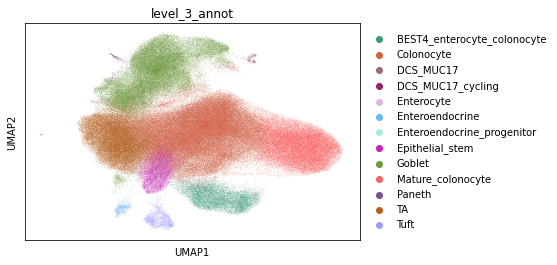

In [7]:
sc.pl.umap(adata,color='level_3_annot')

In [8]:
sc.pl.umap(adata,color='INFLARE_score',cmap='OrRd',size=50)

In [9]:
muc6 = adata[(adata[: , 'MUC6'].X > 1)]

In [10]:
sc.pl.umap(adata,color=['MUC6','AQP5','PGC','BPIFB1'],cmap='OrRd',size=50)

In [11]:
sc.pl.umap(adata,color=['MUC6','INFLARE_score'],cmap='OrRd',size=50)

In [12]:
sc.pl.umap(muc6,color=['MUC6','INFLARE_score'],cmap='OrRd',size=50)

In [13]:
muc6

View of AnnData object with n_obs × n_vars = 50 × 15139
    obs: 'sampleID', 'sourceID', 'donorID_original', 'study', 'donorID_unified', 'donor_category', 'donor_disease', 'organ_original', 'organ_unified', 'organ_broad', 'age_original', 'age_unified', 'sex', 'sample_type', 'sample_category', 'sample_retrieval', 'tissue_fraction', 'cell_fraction_unified', 'cell_sorting', 'technology', 'level_1_annot', 'level_2_annot', 'level_3_annot', 'organ_groups', 'disease', 'control_vs_disease', 'n_counts', 'INFLARE_score'
    var: 'gene_ids', 'feature_type', 'mito', 'ribo', 'hb', 'cc', 'ig', 'tcr', 'hvg'
    uns: 'age_unified_colors', 'control_vs_disease_colors', 'disease_colors', 'level_1_annot_colors', 'level_2_annot_colors', 'level_3_annot_colors', 'log1p', 'neighbors', 'organ_groups_colors', 'organ_unified_colors', 'study_colors', 'umap'
    obsm: 'X_scANVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

/home/jovyan/my-conda-envs/standard_plotting/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


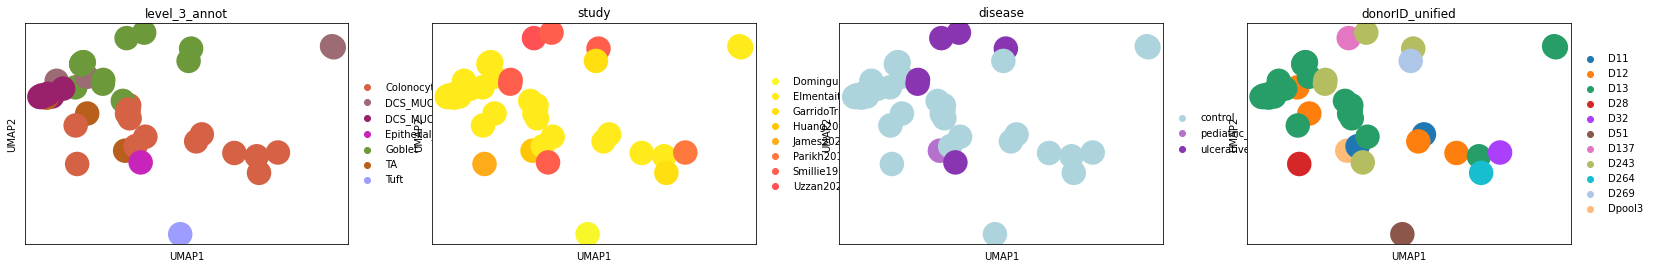

In [14]:
sc.pl.umap(muc6, color=['level_3_annot','study','disease','donorID_unified'])

In [15]:
muc6.obs.disease.value_counts()

control               43
ulcerative_colitis     6
pediatric_IBD          1
Name: disease, dtype: int64

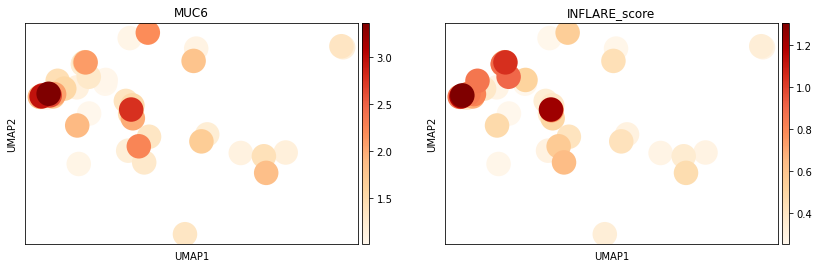

In [16]:
sc.pl.umap(muc6,color=['MUC6','INFLARE_score'],cmap='OrRd')

In [17]:
muc62 = adata[(adata[: , 'MUC6'].X > 2)]

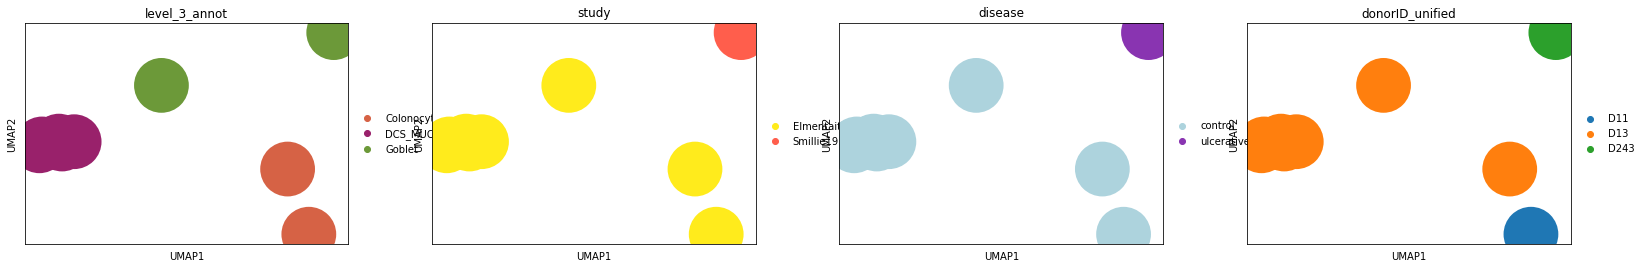

In [18]:
sc.pl.umap(muc62, color=['level_3_annot','study','disease','donorID_unified'])

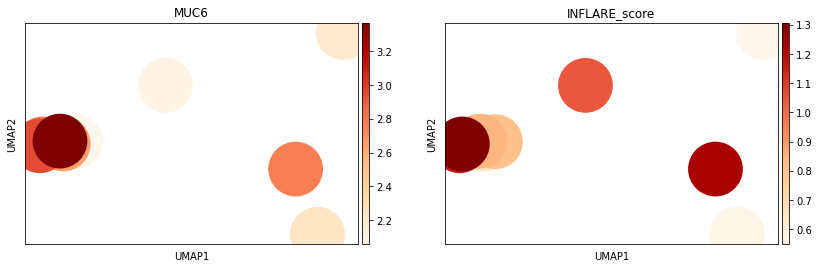

In [19]:
sc.pl.umap(muc62,color=['MUC6','INFLARE_score'],cmap='OrRd')

In [20]:
muc62.obs.disease.value_counts()

control               9
ulcerative_colitis    1
Name: disease, dtype: int64

In [21]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [22]:
plt.rcParams['figure.figsize'] = [5,5]

In [23]:
sc.set_figure_params(
    dpi=200,dpi_save=300,
    fontsize=12,
    transparent=True,
)

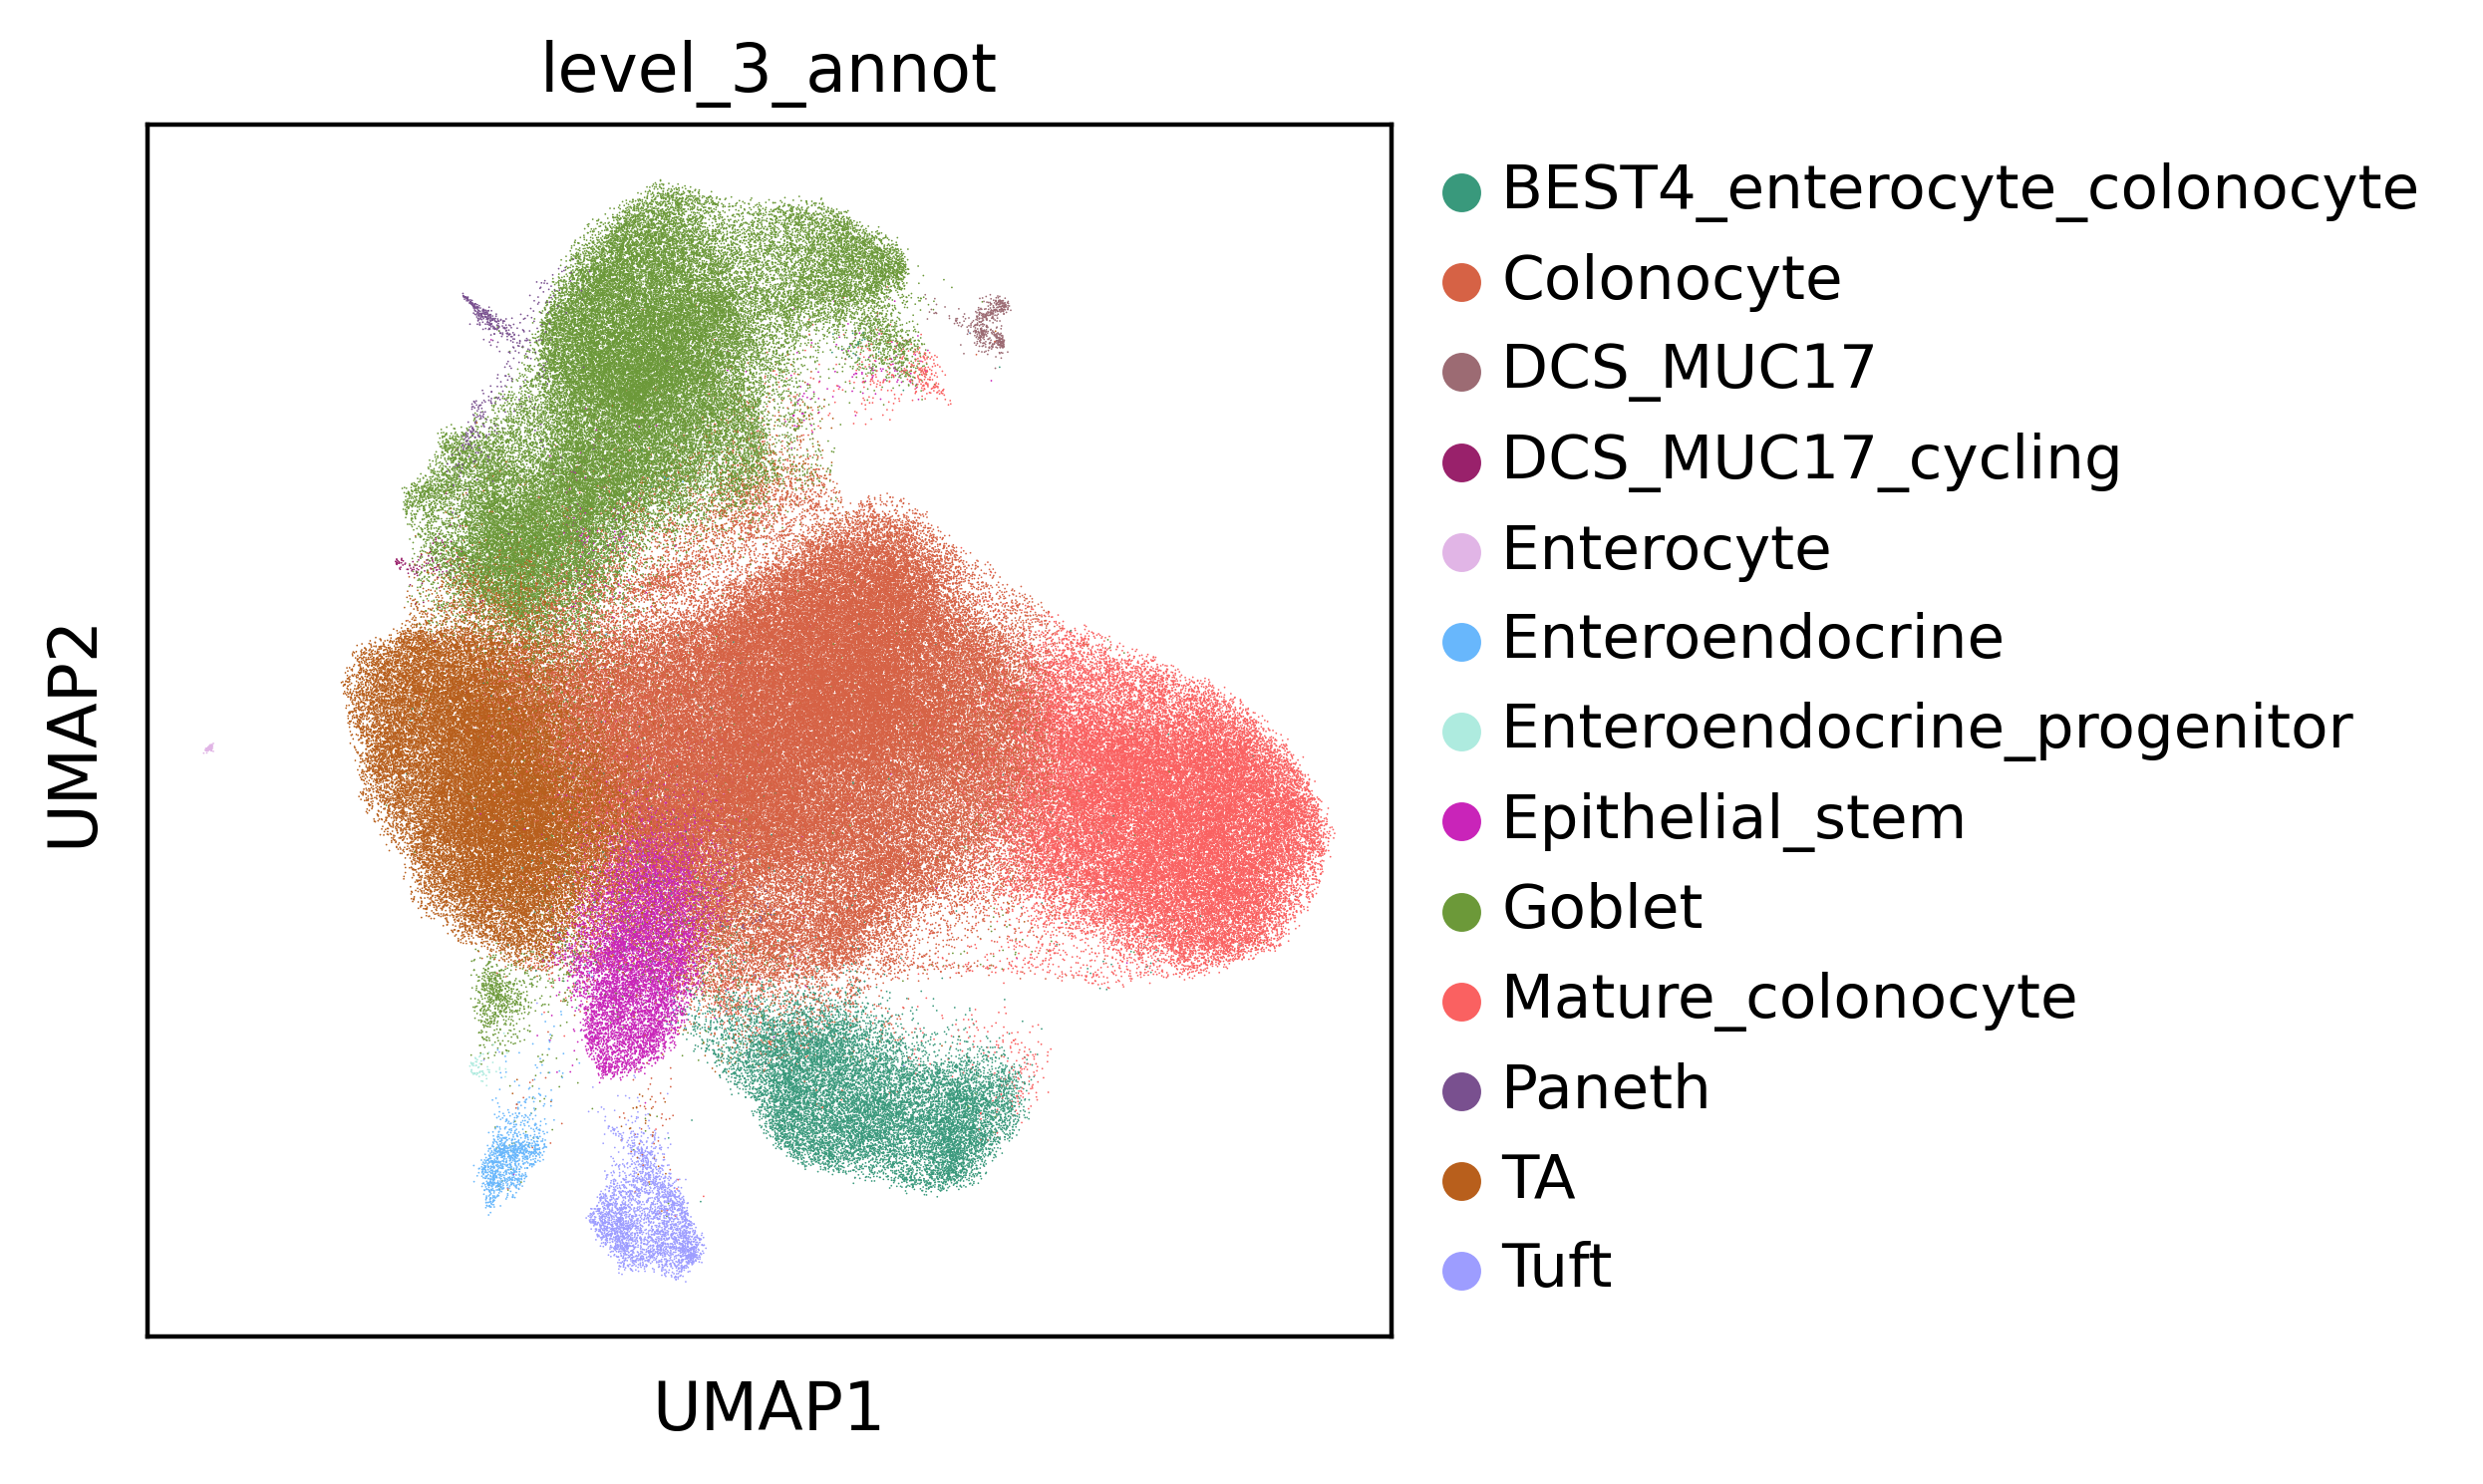

In [24]:
sc.pl.umap(adata,color='level_3_annot',save='LI_epi_level_3_annot.pdf')

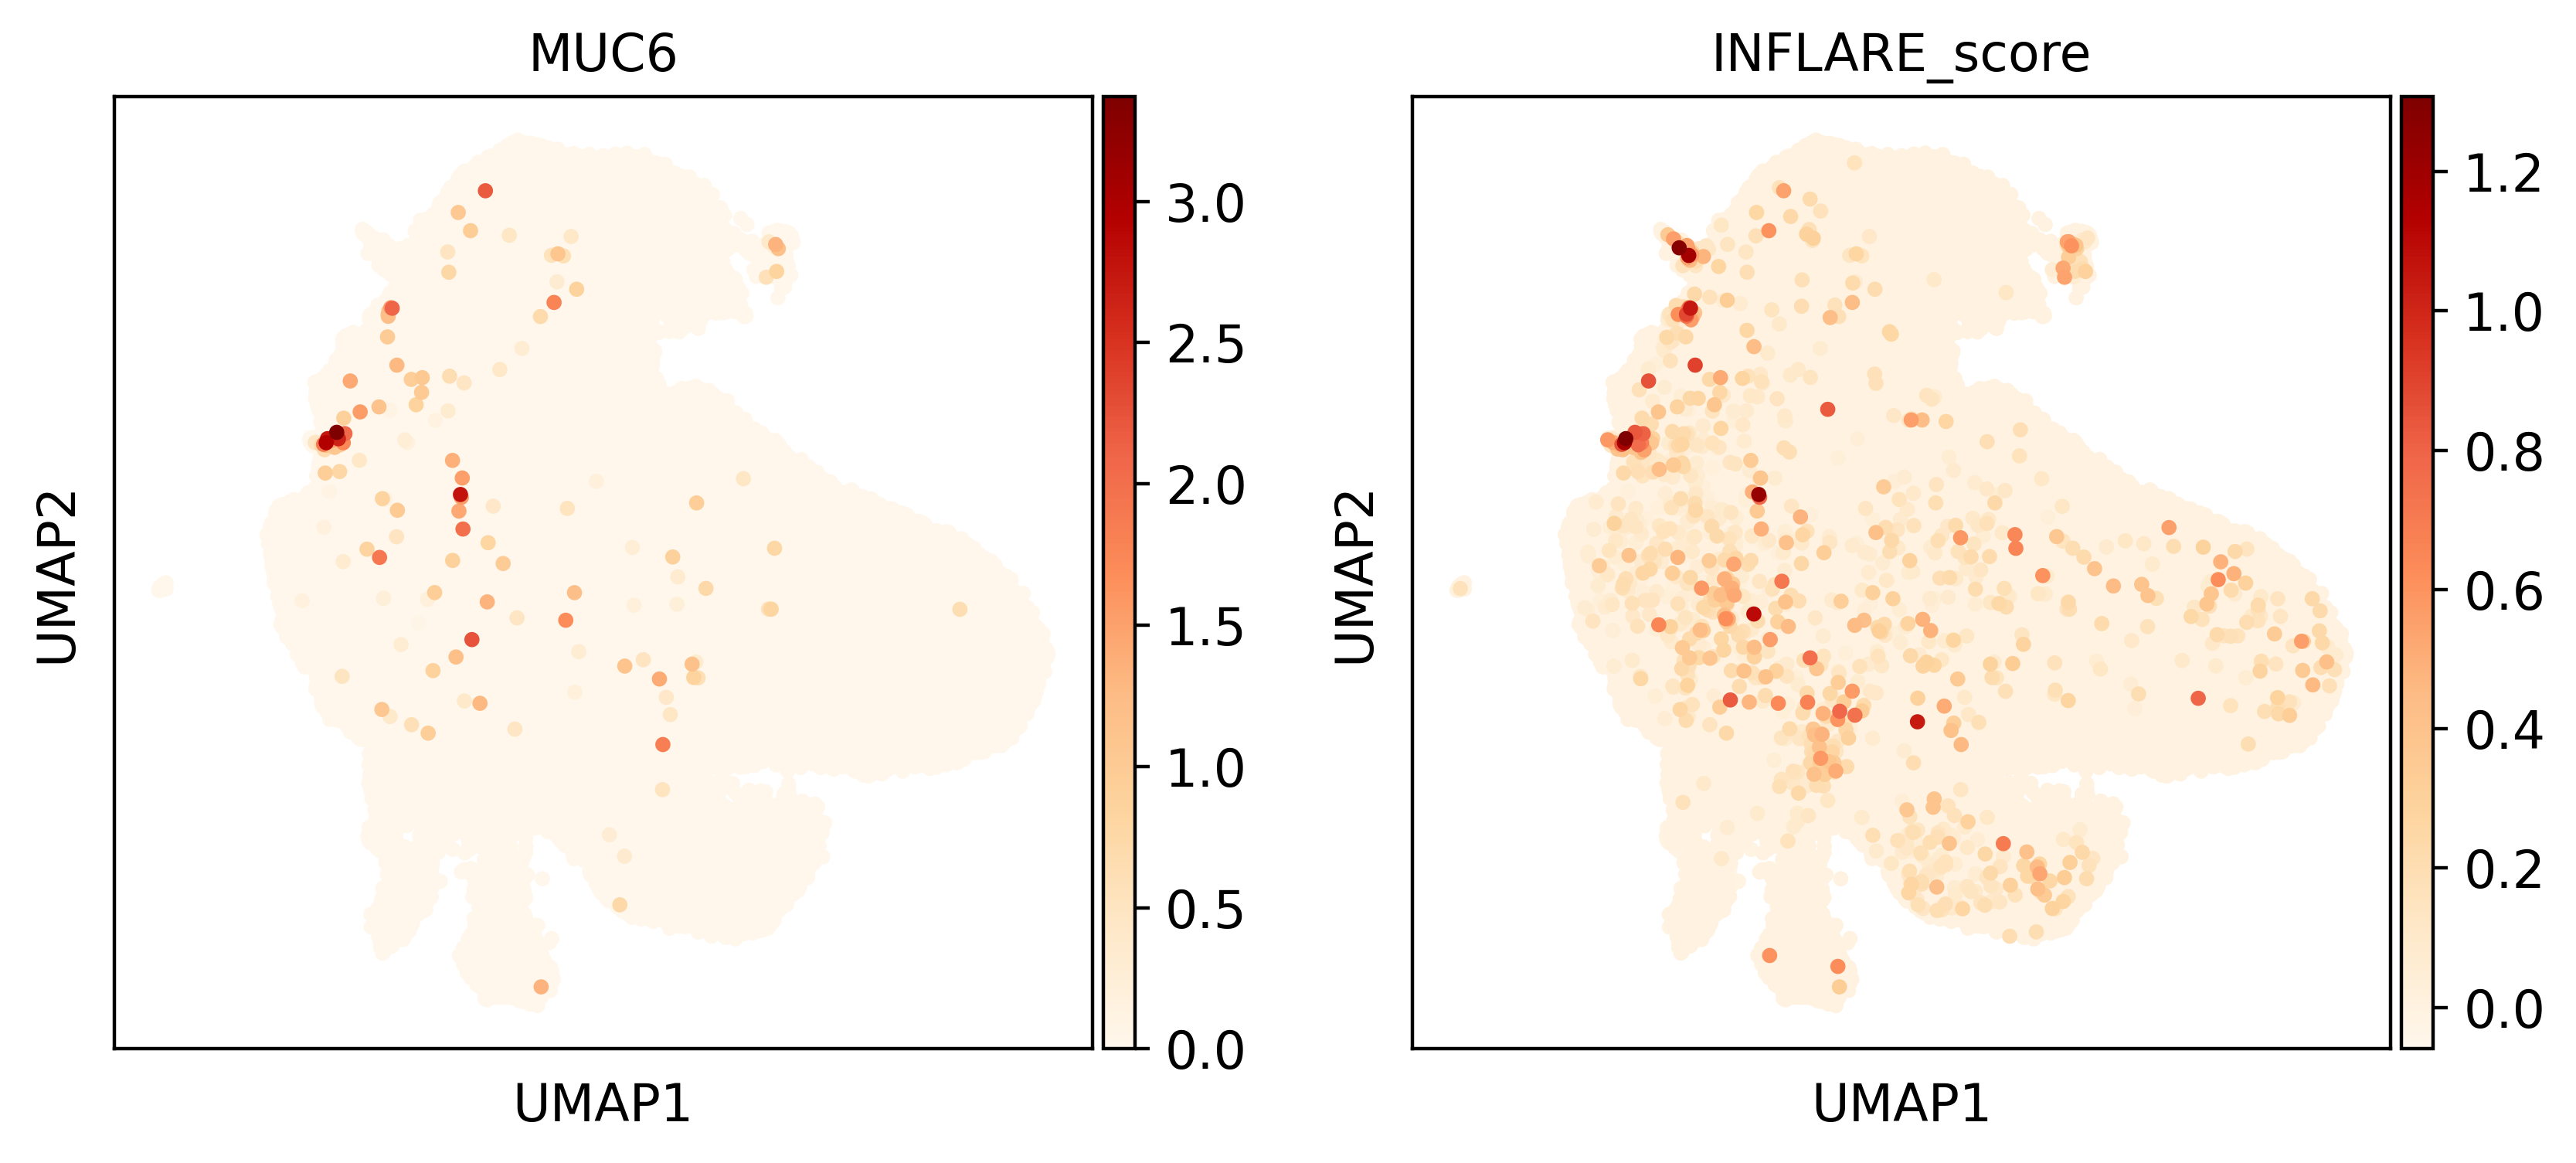

In [25]:
sc.pl.umap(adata,color=['MUC6','INFLARE_score'],cmap='OrRd',size=50,save='LI_epi_MUC6_INFLAREscore.pdf')

In [26]:
sc.pl.umap(muc6,color=['MUC6','INFLARE_score'],cmap='OrRd',save='LI_MUC6_gene_expression_1.pdf')

In [27]:
muc6

AnnData object with n_obs × n_vars = 50 × 15139
    obs: 'sampleID', 'sourceID', 'donorID_original', 'study', 'donorID_unified', 'donor_category', 'donor_disease', 'organ_original', 'organ_unified', 'organ_broad', 'age_original', 'age_unified', 'sex', 'sample_type', 'sample_category', 'sample_retrieval', 'tissue_fraction', 'cell_fraction_unified', 'cell_sorting', 'technology', 'level_1_annot', 'level_2_annot', 'level_3_annot', 'organ_groups', 'disease', 'control_vs_disease', 'n_counts', 'INFLARE_score'
    var: 'gene_ids', 'feature_type', 'mito', 'ribo', 'hb', 'cc', 'ig', 'tcr', 'hvg'
    uns: 'age_unified_colors', 'control_vs_disease_colors', 'disease_colors', 'level_1_annot_colors', 'level_2_annot_colors', 'level_3_annot_colors', 'log1p', 'neighbors', 'organ_groups_colors', 'organ_unified_colors', 'study_colors', 'umap', 'donorID_unified_colors'
    obsm: 'X_scANVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [28]:
del muc6.uns['study_colors']

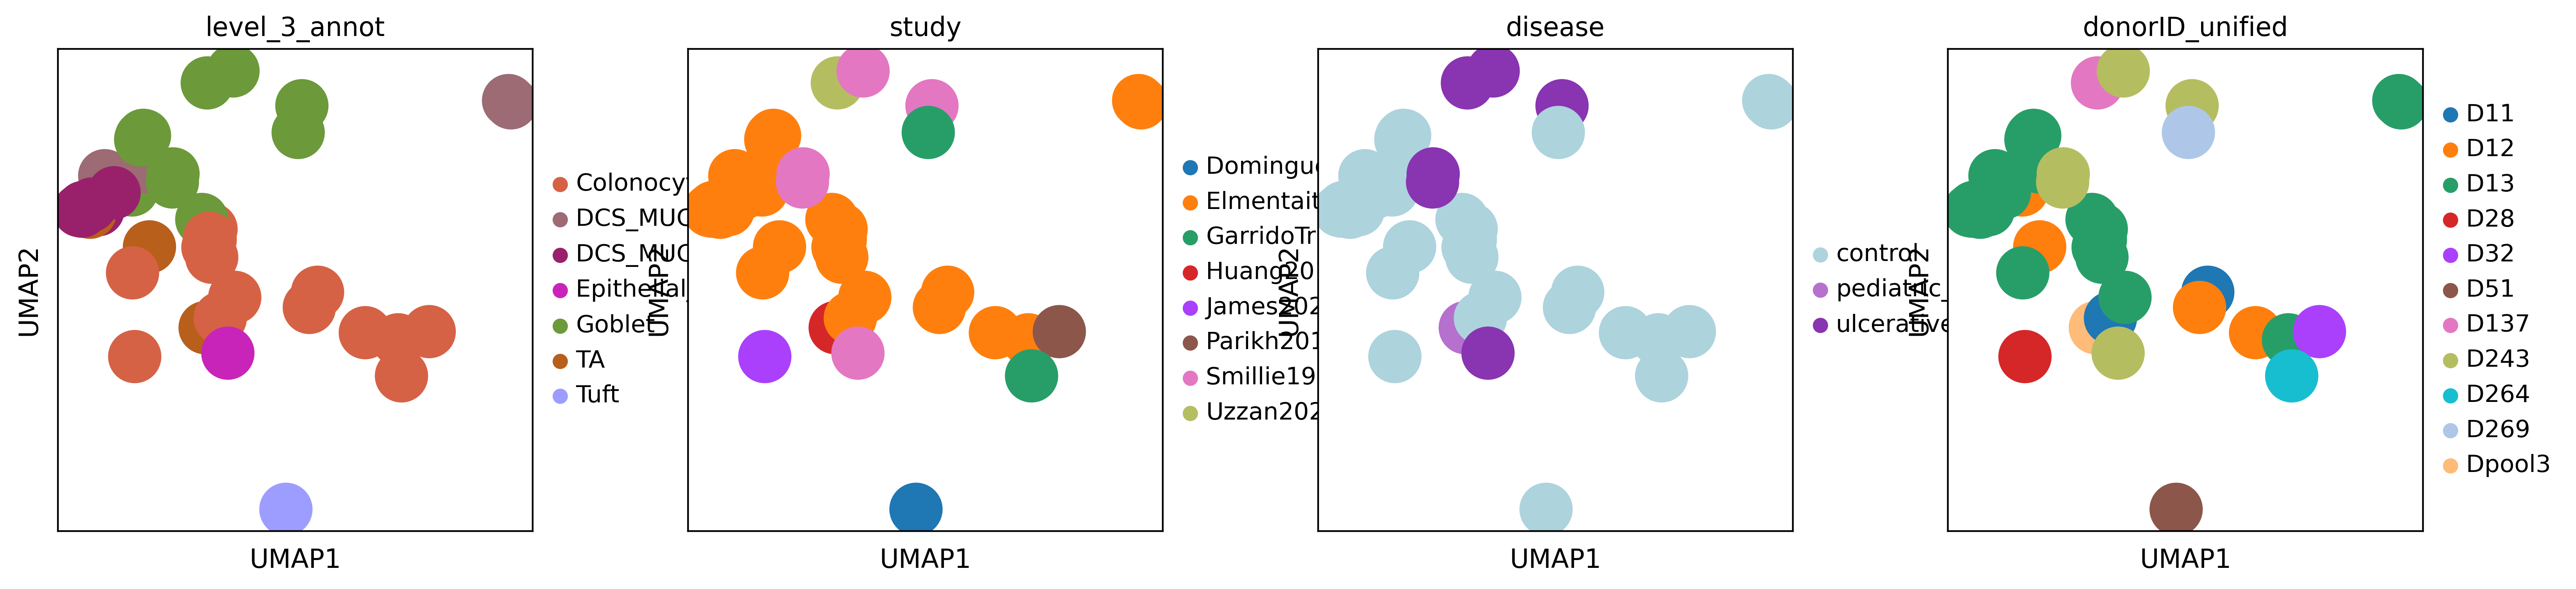

In [29]:
sc.pl.umap(muc6, color=['level_3_annot','study','disease','donorID_unified'],save='LI_MUC6_gene_expression_obs.pdf')